# **Making 5 samples using different techniques and using 5 different models on each**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard-data/Creditcard_data.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/kaggle/input/creditcard-data/Creditcard_data.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(array([763.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

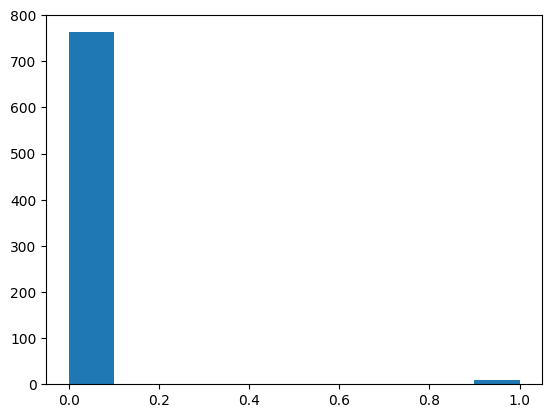

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x='Class',data=df)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Balancing Dataset
from imblearn.over_sampling import RandomOverSampler
x=df.drop('Class',axis=1)
y=df['Class']

ros=RandomOverSampler(random_state=42)

x_resampled,y_resampled=ros.fit_resample(x,y)
sampled_df=pd.concat([pd.DataFrame(x_resampled),pd.Series(y_resampled,name='Class')],axis=1)

In [8]:
sampled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(array([763.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

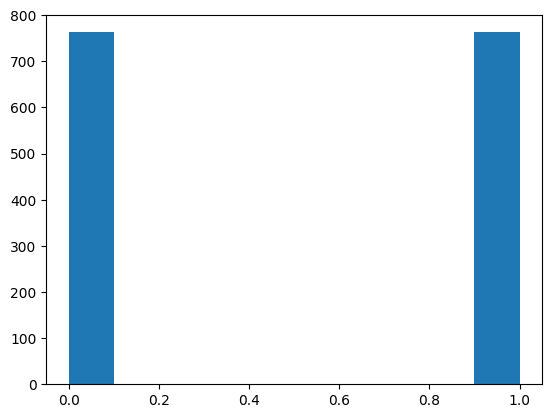

In [9]:
plt.hist(x='Class',data=sampled_df)

In [10]:
#Random Sampling without Replacement
n1=(1.96*1.96*0.5*0.5)/(0.05*0.05)
sampled_data1=sampled_df.sample(n=int(n1),replace=False)

In [11]:
sampled_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
936,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
987,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1241,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
149,93,-0.853807,0.127392,1.267277,0.678584,-1.029851,-0.487614,1.836071,-0.298566,-0.922127,...,0.252358,0.179725,0.476744,0.724705,0.526798,0.502701,-0.159465,0.002761,322.44,0
809,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


In [12]:
#Random Sampling with Replacement
n1=(1.96*1.96*0.5*0.5)/(0.05*0.05)
sampled_data2=sampled_df.sample(n=int(n1),replace=True)

In [13]:
sampled_data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
388,283,-0.529996,0.766554,1.759393,-1.160074,-0.501040,-1.404513,0.679279,-0.242594,0.520868,...,-0.163031,-0.219408,0.016959,0.934128,-0.327383,0.668479,0.114264,-0.091385,2.31,0
1285,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
728,550,1.101844,-0.174473,0.446908,0.899499,-0.666440,-0.697084,0.030418,-0.121760,0.539945,...,-0.197925,-0.567183,-0.040194,0.412944,0.411435,0.263744,-0.038703,0.023469,74.22,0
580,433,-0.579831,0.885570,0.730111,0.756647,0.636427,-0.455797,0.825371,-0.188678,-0.873479,...,0.178555,0.511952,-0.129813,0.031972,-0.460445,-0.435319,-0.073064,0.246336,34.27,0
1300,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


In [14]:
#Systematic sampling
import math
n=len(sampled_df)
k = int(math.sqrt(n))
sampled_data3 = sampled_df.iloc[::k]

In [15]:
sampled_data3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
39,29,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
78,50,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.79,0
117,76,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.00,0
156,98,-0.646513,1.004199,1.616224,-0.099628,-0.122477,-0.671327,0.656183,0.009755,-0.635963,...,-0.147934,-0.420046,0.061424,0.520997,-0.238845,0.030135,0.140481,0.101163,14.98,0


In [16]:
#Cluster Sampling with 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10,random_state=42)
sampled_df['Cluster'] = kmeans.fit_predict(sampled_df.drop('Class', axis=1))

sampled_data4 = pd.concat([sampled_df[sampled_df['Cluster'] == i].sample(n=10, random_state=42 , replace = True) for i in range(5)], ignore_index=True)
sampled_data4 = sampled_data4.drop('Cluster', axis = 1)

In [17]:
sampled_data4.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,69,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.76,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,200,-1.269461,-1.027153,2.261373,-0.504356,0.693421,1.237761,0.056065,0.091919,-0.676680,...,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556,79.00,0
3,73,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0
4,47,1.197839,0.236828,0.509605,0.657659,-0.365488,-0.745101,0.079497,-0.130536,-0.052263,...,-0.149876,-0.374211,0.145516,0.414984,0.212156,0.181724,-0.016402,0.015994,3.63,0


In [18]:
#Stratified sampling with no. of strats=2
sampled_data5 = sampled_df.groupby('Class').apply(lambda x: x.sample(n=250, random_state=42)).reset_index(drop=True)
sampled_data5 = sampled_data5.drop('Cluster', axis = 1)

In [19]:
sampled_data5.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
1,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98,0
2,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.56,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0


In [20]:
sampled_df=sampled_df.drop('Cluster',axis=1)

In [21]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42)
}
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop('Class', axis=1), sampled_df['Class'], test_size=0.2, random_state=42)

In [22]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
196,130,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.089378,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97
752,561,1.214872,0.307970,0.278629,0.642981,-0.185161,-0.603602,0.006881,-0.064239,0.030872,...,-0.115172,-0.260682,-0.716148,0.159804,0.033516,0.143170,0.124259,-0.006506,0.027226,0.89
1283,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
81,52,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,...,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580,6.67
1429,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,-0.118283,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00


In [23]:
def fit_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    return score

In [24]:
list1=[sampled_data1,sampled_data2,sampled_data3,sampled_data4,sampled_data5]
list2=list(models.keys())
list3=['Random Sampling Without Replacement','Random Sampling With Replacement','Systematic Sampling','Cluster Sampling','Stratified Sampling']

In [25]:
list2

['KNN',
 'Decision Tree',
 'Random Forest',
 'Gaussian Naive Bayes',
 'Logistic Regression']

In [26]:
results=[]
for sample in list1:
    temp=[]
    for model_name in list2:
        accuracy=fit_model(models[model_name],sample.drop(['Class'],axis=1),sample['Class'],X_test,y_test)
        temp.append(accuracy)
    results.append(temp)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
results

[[0.9444444444444444,
  0.9836601307189542,
  1.0,
  0.6797385620915033,
  0.9150326797385621],
 [0.934640522875817,
  0.9673202614379085,
  0.9869281045751634,
  0.7745098039215687,
  0.8986928104575164],
 [0.7450980392156863,
  0.7777777777777778,
  0.7908496732026143,
  0.7189542483660131,
  0.7516339869281046],
 [0.6764705882352942,
  0.9215686274509803,
  0.9150326797385621,
  0.6437908496732027,
  0.7026143790849673],
 [0.9705882352941176,
  0.9836601307189542,
  1.0,
  0.6862745098039216,
  0.8986928104575164]]

In [28]:
dict1={}
j=0
for i in list3:
    dict1[i]=results[j]
    j=j+1

In [29]:
results_df=pd.DataFrame(dict1,index=list2)

In [30]:
results_df

,Random Sampling Without Replacement,Random Sampling With Replacement,Systematic Sampling,Cluster Sampling,Stratified Sampling
KNN,0.944444,0.934641,0.745098,0.676471,0.970588
Decision Tree,0.983660,0.967320,0.777778,0.921569,0.983660
Random Forest,1.000000,0.986928,0.790850,0.915033,1.000000
Gaussian Naive Bayes,0.679739,0.774510,0.718954,0.643791,0.686275
Logistic Regression,0.915033,0.898693,0.751634,0.702614,0.898693
